## Speed difference between reading numerical data from plain CSV vs. using _.npy_ file format

In [31]:
import numpy as np
import time

In [48]:
n_samples=1000000

In [49]:
with open('fdata.txt', 'w') as fdata:
    for _ in range(n_samples):
        fdata.write(str(10*np.random.random())+',')

In [50]:
t1=time.time()
array_direct = np.fromfile('fdata.txt',dtype=float, count=-1,sep=',').reshape(1000,1000)
t2=time.time()
print(array_direct)
print('\nShape: ',array_direct.shape)
print(f"Time took to read: {t2-t1} seconds.")

[[0.32614787 6.84798256 2.59321025 ... 5.02387324 1.04806225 2.80646522]
 [0.42535168 3.77882315 0.91426996 ... 8.43664343 5.50435042 1.17847223]
 [1.79458482 5.82172793 5.29433626 ... 3.10556071 2.90960252 7.8021901 ]
 ...
 [3.04453929 1.0270109  8.04185826 ... 2.21814825 3.56490017 3.72934854]
 [7.11767505 7.59239626 5.60733328 ... 8.33572855 3.29231441 8.67716649]
 [4.2606672  0.08492747 1.40436949 ... 5.6204355  4.47407948 9.50940101]]

Shape:  (1000, 1000)
Time took to read: 2.671266555786133 seconds.


In [52]:
t1=time.time()
with open('fdata.txt','r') as fdata:
    datastr=fdata.read()
lst = datastr.split(',')
lst.pop()
array_lst=np.array(lst,dtype=float).reshape(1000,1000)
t2=time.time()
print(array_lst)
print('\nShape: ',array_lst.shape)
print(f"Time took to read: {t2-t1} seconds.")

[[0.32614787 6.84798256 2.59321025 ... 5.02387324 1.04806225 2.80646522]
 [0.42535168 3.77882315 0.91426996 ... 8.43664343 5.50435042 1.17847223]
 [1.79458482 5.82172793 5.29433626 ... 3.10556071 2.90960252 7.8021901 ]
 ...
 [3.04453929 1.0270109  8.04185826 ... 2.21814825 3.56490017 3.72934854]
 [7.11767505 7.59239626 5.60733328 ... 8.33572855 3.29231441 8.67716649]
 [4.2606672  0.08492747 1.40436949 ... 5.6204355  4.47407948 9.50940101]]

Shape:  (1000, 1000)
Time took to read: 1.018733024597168 seconds.


In [53]:
np.save('fnumpy.npy',array_lst)

In [55]:
t1=time.time()
array_reloaded = np.load('fnumpy.npy')
t2=time.time()
print(array_reloaded)
print('\nShape: ',array_reloaded.shape)
print(f"Time took to load: {t2-t1} seconds.")

[[0.32614787 6.84798256 2.59321025 ... 5.02387324 1.04806225 2.80646522]
 [0.42535168 3.77882315 0.91426996 ... 8.43664343 5.50435042 1.17847223]
 [1.79458482 5.82172793 5.29433626 ... 3.10556071 2.90960252 7.8021901 ]
 ...
 [3.04453929 1.0270109  8.04185826 ... 2.21814825 3.56490017 3.72934854]
 [7.11767505 7.59239626 5.60733328 ... 8.33572855 3.29231441 8.67716649]
 [4.2606672  0.08492747 1.40436949 ... 5.6204355  4.47407948 9.50940101]]

Shape:  (1000, 1000)
Time took to load: 0.009010076522827148 seconds.


In [56]:
t1=time.time()
array_reloaded = np.load('fnumpy.npy').reshape(10000,100)
t2=time.time()
print(array_reloaded)
print('\nShape: ',array_reloaded.shape)
print(f"Time took to load: {t2-t1} seconds.")

[[0.32614787 6.84798256 2.59321025 ... 3.01180325 2.39479796 0.72345778]
 [3.69505384 4.53401889 8.36879084 ... 9.9009631  7.33501957 2.50186053]
 [4.35664074 4.07578682 1.71320519 ... 8.33236349 7.2902005  5.27535724]
 ...
 [1.11051629 5.43382324 3.86440843 ... 4.38217095 0.23810232 1.27995629]
 [2.56255361 7.8052843  6.67015391 ... 3.02916997 4.76569949 0.95855667]
 [6.06043577 5.8964256  4.57181929 ... 5.6204355  4.47407948 9.50940101]]

Shape:  (10000, 100)
Time took to load: 0.010006189346313477 seconds.


### Speed enhancement as the sample size grows...

In [72]:
n_samples=[100000*i for i in range(1,11)] 
time_lst_read=[]
time_npy_read=[]

for sample_size in n_samples:
    with open('fdata.txt', 'w') as fdata:
        for _ in range(sample_size):
            fdata.write(str(10*np.random.random())+',')

    t1=time.time()
    with open('fdata.txt','r') as fdata:
        datastr=fdata.read()
    lst = datastr.split(',')
    lst.pop()
    array_lst=np.array(lst,dtype=float)
    t2=time.time()
    time_lst_read.append(1000*(t2-t1))
    print("Array shape:",array_lst.shape)

    np.save('fnumpy.npy',array_lst)

    t1=time.time()
    array_reloaded = np.load('fnumpy.npy')
    t2=time.time()
    time_npy_read.append(1000*(t2-t1))
    print("Array shape:",array_reloaded.shape)
    
    print(f"Processing done for {sample_size} samples\n")

Array shape: (100000,)
Array shape: (100000,)
Processing done for 100000 samples

Array shape: (200000,)
Array shape: (200000,)
Processing done for 200000 samples

Array shape: (300000,)
Array shape: (300000,)
Processing done for 300000 samples

Array shape: (400000,)
Array shape: (400000,)
Processing done for 400000 samples

Array shape: (500000,)
Array shape: (500000,)
Processing done for 500000 samples

Array shape: (600000,)
Array shape: (600000,)
Processing done for 600000 samples

Array shape: (700000,)
Array shape: (700000,)
Processing done for 700000 samples

Array shape: (800000,)
Array shape: (800000,)
Processing done for 800000 samples

Array shape: (900000,)
Array shape: (900000,)
Processing done for 900000 samples

Array shape: (1000000,)
Array shape: (1000000,)
Processing done for 1000000 samples



In [73]:
import matplotlib.pyplot as plt

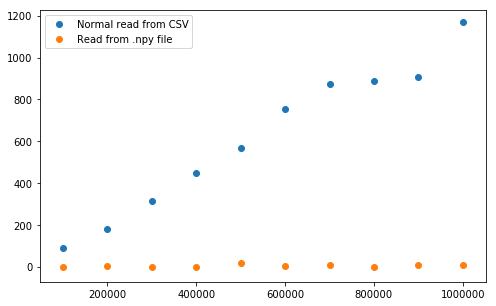

In [74]:
plt.figure(figsize=(8,5))
#plt.xscale('log')
#plt.yscale('log')
plt.scatter(n_samples,time_lst_read)
plt.scatter(n_samples,time_npy_read)
plt.legend(['Normal read from CSV','Read from .npy file'])
plt.show()

In [75]:
time_npy_read

[0.0,
 2.5005340576171875,
 0.0,
 0.0,
 15.625238418579102,
 5.503654479980469,
 7.005214691162109,
 0.5002021789550781,
 6.002664566040039,
 9.006738662719727]